In [2]:
%pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import subplots as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from ISLP import load_data, confusion_table
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR,
      RandomForestClassifier as RC, 
      GradientBoostingClassifier as GBC)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold as KF
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      ShuffleSplit)
from sklearn.decomposition import PCA
from sklearn.base import clone
from ISLP.models import sklearn_sm
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SequentialFeatureSelector

# Data Engineering

In [4]:
data = pd.read_csv("Cancer_Data.csv").rename(columns={"Unnamed: 0" :"Sample"})


# Feature Selection

In [28]:
X = data.drop(columns={"diagnosis"}).drop(columns={"Unnamed: 32"})
y = data["diagnosis"]

In [29]:
lr_model = LogisticRegression(max_iter=100000)

# forward selection to determine best features, with a cross validation of 5 folds
#determined the best 25 predictors

sfs = SFS(estimator=lr_model, k_features='best', forward=True, scoring="accuracy", cv=5, n_jobs=-1)
'''sfs = SequentialFeatureSelector(model, 
                                 n_features_to_select="auto",
                                 tol= 0.1, # Minimum score improvement
                                 direction="forward", 
                                 scoring="accuracy", 
                                 cv=5,
                                 n_jobs= -1)'''

sfs.fit(X, y)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=100000),
                          k_features=(1, 31), n_jobs=-1, scoring='accuracy')

In [30]:
lr_selected_features= list(sfs.k_feature_names_)
lr_selected_features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst']

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# forward selection to determine best features, with a cross validation of 5 folds
#determined the best 25 predictors

sfs = SFS(estimator=rf_model, k_features='best', forward=True, scoring="accuracy", cv=5, n_jobs=-1)
'''sfs = SequentialFeatureSelector(model, 
                                 n_features_to_select="auto",
                                 tol= 0.1, # Minimum score improvement
                                 direction="forward", 
                                 scoring="accuracy", 
                                 cv=5,
                                 n_jobs= -1)'''

sfs.fit(X, y)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=42),
                          k_features=(1, 31), n_jobs=-1, scoring='accuracy')

In [32]:
rf_selected_features= list(sfs.k_feature_names_)
rf_selected_features

['radius_mean',
 'perimeter_se',
 'smoothness_se',
 'texture_worst',
 'perimeter_worst',
 'smoothness_worst']

In [33]:
from sklearn.ensemble import RandomForestClassifier

#data for the selected features from k fold feature selection
X_selected=data[lr_selected_features]

#create test train split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)



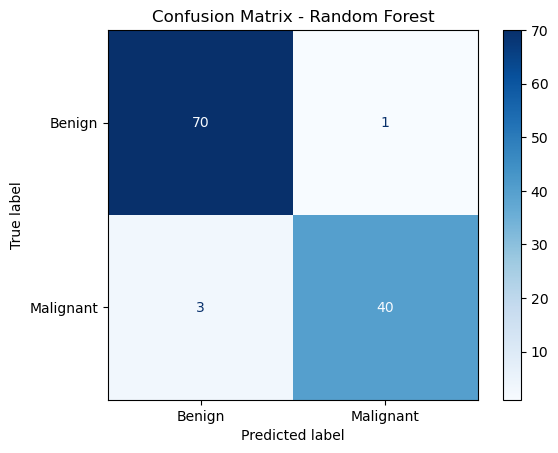

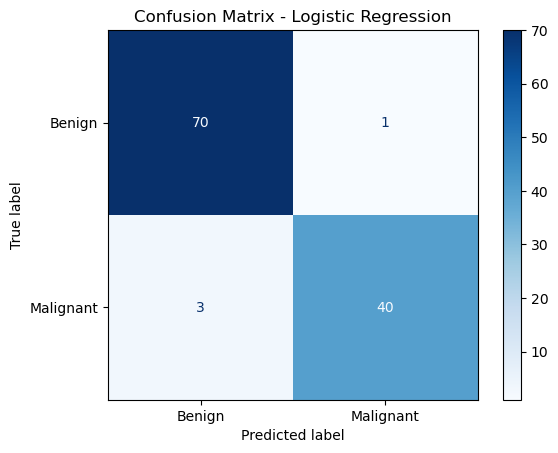

In [ ]:
#features selected by logistic regression
#I cant figure out why both models give the exact same confusion matrix. When the features are selected by random forest, the models behave differently
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train Random Forest Model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train Logistic Regression Model
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Generate confusion matrices for both models
rf_cm = confusion_matrix(y_test, y_pred_rf)
lr_cm = confusion_matrix(y_test, y_pred_lr)

# Optional: provide class names if your target values are labels like "B" and "M"
labels = ['Benign', 'Malignant'] if 'B' in y_test.values else None

# Plot Confusion Matrix for Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=labels)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Plot Confusion Matrix for Logistic Regression
disp_lr = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=labels)
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [35]:
#data for the selected features from k fold feature selection
X_selected=data[rf_selected_features]

#create test train split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

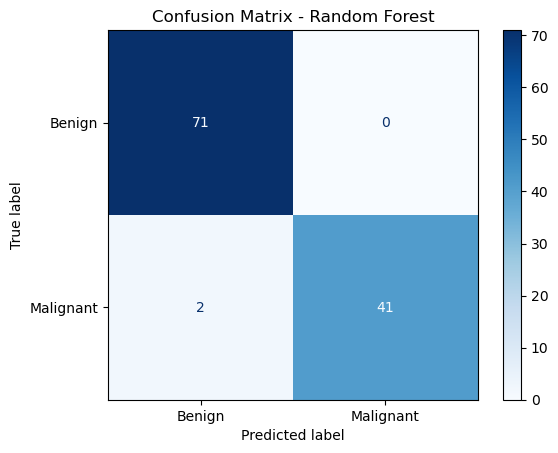

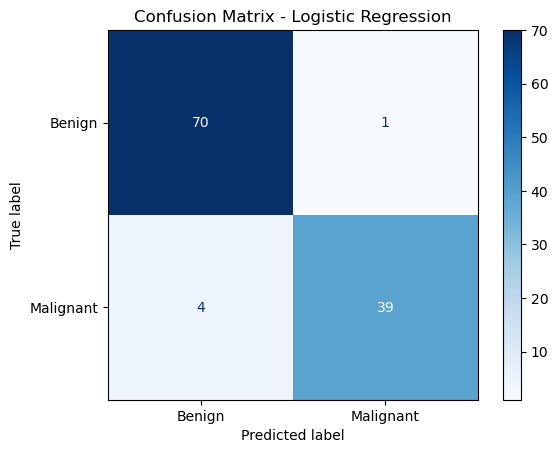

In [36]:
#features selcted by random forest 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Train Random Forest Model
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Train Logistic Regression Model
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Generate confusion matrices for both models
rf_cm = confusion_matrix(y_test, y_pred_rf)
lr_cm = confusion_matrix(y_test, y_pred_lr)

# Optional: provide class names if your target values are labels like "B" and "M"
labels = ['Benign', 'Malignant'] if 'B' in y_test.values else None

# Plot Confusion Matrix for Random Forest
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=labels)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Plot Confusion Matrix for Logistic Regression
disp_lr = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=labels)
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()